<a href="https://colab.research.google.com/github/Nvm-seff/DB-A2/blob/main/21i0830_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Modelling

## Assignment 1

**Saifullah Rizwan**

**Roll Number:** *21i-0830*

**Section :** *B*

### Importing the libraries

In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
from scipy.stats import pearsonr

In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()


Saving iris2.csv to iris2.csv


In [ ]:
file_path = "iris2.csv"
data = pd.read_csv(file_path)

# Print the data
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
150           8.9          8.9           8.9          8.9  virginica
151           9.5          9.5           9.5          9.5  virginica

[152 rows x 5 columns]


In [ ]:
sepal_length = data['sepal_length'].values
sepal_width = data['sepal_width'].values
petal_length = data['petal_length'].values
petal_width = data['petal_width'].values
species = data['species'].values

In [ ]:
X = data['sepal_length']
Y = data['petal_width']
Z = data['petal_length']
corr_coefficient_1, p_value_1 = pearsonr(X, Y)
corr_coefficient_2, p_value_2 = pearsonr(Y, Z)
print("Pearson Correlation Coefficient(Sepal Length & Petal Width):", corr_coefficient_1)
print("Pearson Correlation Coefficient(Petal Width & Petal Length):", corr_coefficient_2)

Pearson Correlation Coefficient(Sepal Length & Petal Width): 0.7985336058431005
Pearson Correlation Coefficient(Petal Width & Petal Length): 0.8362592156819997


I selected Petal Length (PL) as the independent variable (X) for the linear regression model due to its strong correlation with Petal Width (PW), which has the highest absolute correlation coefficient of 0.836259. This significant positive correlation indicates that variations in Petal Length are closely linked to variations in Petal Width, making Petal Length a more suitable predictor for Petal Width in the linear regression model.

In [ ]:
Y = data['petal_width']
X1 = data['petal_length']

with pm.Model() as model1:
    alpha1 = pm.Normal('alpha1', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    epsilon1 = pm.HalfNormal('epsilon1', sigma=1)

    mu1 = alpha1 + beta1 * X1

    likelihood1 = pm.Normal('Y1', mu=mu1, sigma=epsilon1, observed=Y)

In [ ]:
with model1:
    trace1 = pm.sample(1000, tune=1000)

Output()

Output()

In [ ]:
az.summary(trace1)





,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha1,-0.736,0.124,-0.945,-0.496,0.004,0.003,798.0,879.0,1.01
beta1,0.533,0.029,0.480,0.586,0.001,0.001,793.0,843.0,1.01
epsilon1,0.658,0.037,0.590,0.729,0.001,0.001,1205.0,913.0,1.00


In [ ]:
variable_names = list(trace1.posterior.data_vars)
print(variable_names)


['alpha1', 'beta1', 'epsilon1']


In [ ]:
Y = data['petal_width']
X2 = data['sepal_length']

with pm.Model() as model2:
    alpha2 = pm.Normal('alpha2', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    epsilon2 = pm.HalfNormal('epsilon2', sigma=1)

    mu2 = alpha2 + beta2 * X2

    likelihood2 = pm.Normal('Y2', mu=mu2, sigma=epsilon2, observed=Y)

In [ ]:
with model2:
    trace2 = pm.sample(1000, tune=1000)

Output()

Output()

In [ ]:
az.summary(trace2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha2,-4.820,0.396,-5.600,-4.114,0.016,0.011,612.0,544.0,1.0
beta2,1.040,0.066,0.925,1.174,0.003,0.002,613.0,575.0,1.0
epsilon2,0.719,0.042,0.643,0.798,0.002,0.001,668.0,683.0,1.0


In [ ]:
variable_names = list(trace2.posterior.data_vars)
print(variable_names)


['alpha2', 'beta2', 'epsilon2']


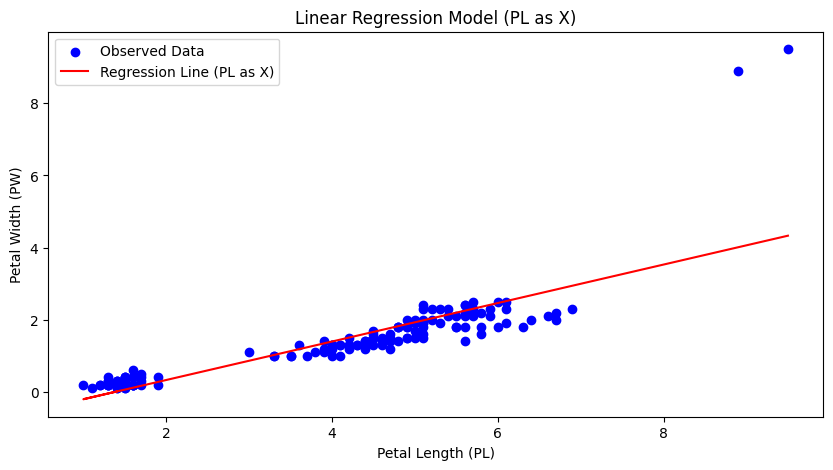

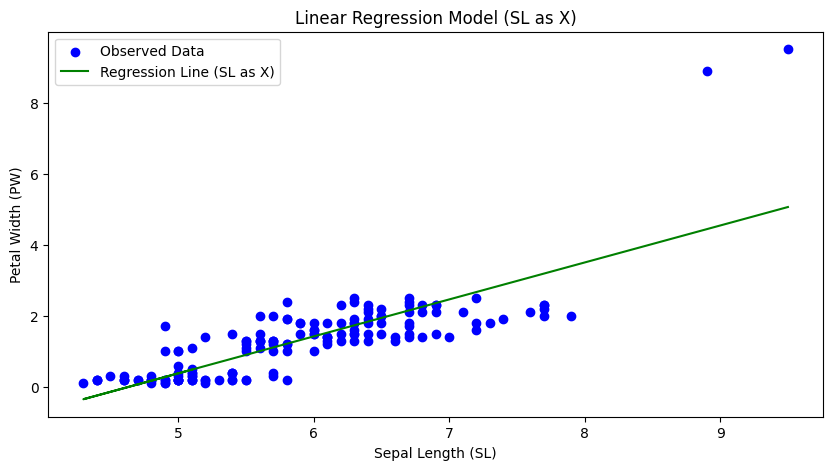

In [ ]:
# Plot for model1 (PL as X)
plt.figure(figsize=(10, 5))
plt.scatter(X1, Y, label="Observed Data", color='b')

# Extract the mean values for alpha1 and beta1 from trace1
alpha1_mean = trace1.posterior['alpha1'].mean(dim='chain').values.flatten().mean()
beta1_mean = trace1.posterior['beta1'].mean(dim='chain').values.flatten().mean()

# Make predictions for Petal Width using Petal Length
y1_pred = alpha1_mean + beta1_mean * X1

# Plot the regression line
plt.plot(X1, y1_pred, label="Regression Line (PL as X)", color='r')
plt.xlabel("Petal Length (PL)")
plt.ylabel("Petal Width (PW)")
plt.title("Linear Regression Model (PL as X)")
plt.legend()
plt.show()

# Plot for model2 (SL as X)
plt.figure(figsize=(10, 5))
plt.scatter(X2, Y, label="Observed Data", color='b')

# Extract mean values for alpha2 and beta2 from trace2
alpha2_mean = trace2.posterior['alpha2'].mean(dim='chain').values.flatten().mean()
beta2_mean = trace2.posterior['beta2'].mean(dim='chain').values.flatten().mean()

# Make predictions for Petal Width using Sepal Length
y2_pred = alpha2_mean + beta2_mean * X2

# Plot the regression line
plt.plot(X2, y2_pred, label="Regression Line (SL as X)", color='g')
plt.xlabel("Sepal Length (SL)")
plt.ylabel("Petal Width (PW)")
plt.title("Linear Regression Model (SL as X)")
plt.legend()
plt.show()


In [ ]:
def r_squared(y, y_pred):
    return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

r_squared1 = r_squared(Y, y1_pred)
r_squared2 = r_squared(Y, y2_pred)

In [ ]:
print("R-squared value for the model with Petal Length as X:", r_squared1)
print("R-squared value for the model with Sepal Length as X:", r_squared2)

R-squared value for the model with Petal Length as X: 0.6993272364774428
R-squared value for the model with Sepal Length as X: 0.6376431803064435


The model utilizing Petal Length as the independent variable achieved an R-squared value of 0.6993, indicating that roughly 69.93% of the variability in Petal Width can be accounted for by this model. In contrast, the model with Sepal Length as the independent variable produced an R-squared value of 0.6376, implying that about 63.76% of the variability is explained. Consequently, the model with Petal Length as the independent variable demonstrates a slightly better fit to the data, as it accounts for a greater proportion of the variability in Petal Width.